## Visualizing Spherical harmonics

In [1]:
%matplotlib inline

# First load the numpy/scipy/matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 3D plotting
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

#Interactive widgets
import ipywidgets as widgets
from IPython.display import display

#Increase resolution of plots
%config InlineBackend.figure_format = 'retina'

### Import [spherical harmonics](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html#scipy.special.sph_harm) from scipy [special functions collection](https://docs.scipy.org/doc/scipy/reference/special.html)


In [2]:
#Import spherical harmonics
from scipy.special import sph_harm

$$
Y_{lm}(\phi,\theta) = \sqrt{\frac{2l+1}{4\pi} \frac{(l-m)!}{(l+m)!} } P_{lm}(cos \phi) \cdot e^{im\theta}
$$

Notice that scipy adopts slightly different convenient of angles than what is adopted in textbook. 

- **m array_like**
Order of the harmonic (int); must have |m| <= l.

- **l array_like**
Degree of the harmonic (int); must have l >= 0. 

- **$\theta$ array_like**
Azimuthal (longitudinal) coordinate; must be in $[0, 2\pi]$.

- **$\phi$ array_like**
Polar (colatitudinal) coordinate; must be in $[0, \pi]$.

In [3]:
# Create 2D grid of angular variables

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Convert to cartesian coordinates. r=const=1 for convenience
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

/var/folders/x2/ggtknn9s49s3dcq96ckcgfgh0000gn/T/ipykernel_16916/2655294372.py:5: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Ylm  = sph_harm(m, l, theta, phi).real


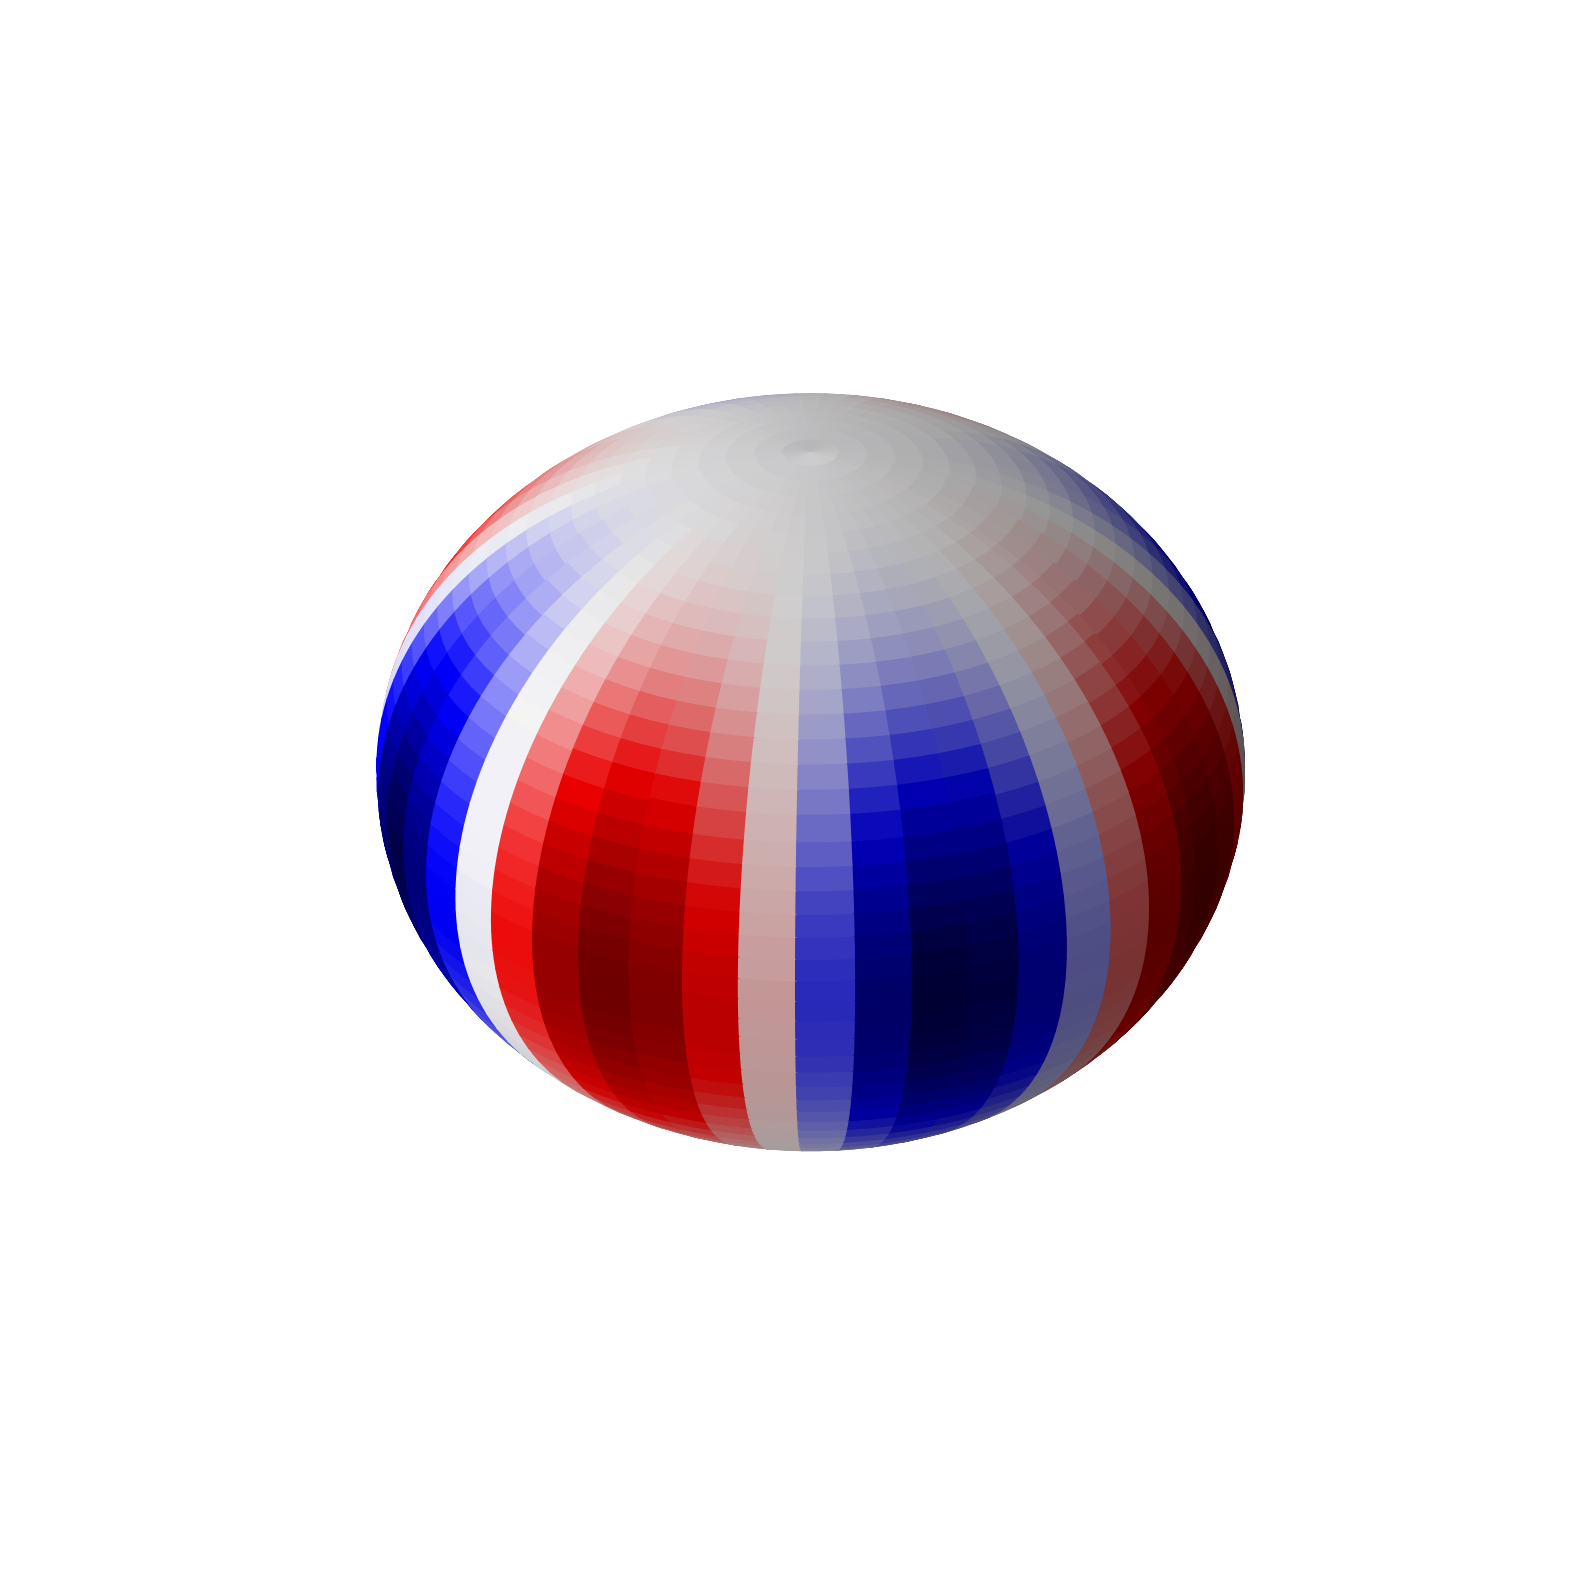

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

m, l = 4, 4
Ylm  = sph_harm(m, l, theta, phi).real

#normalize color to [0,1] corresponding to magnitude of spherical harmonic

fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())

ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors))

# Turn off the axis planes
ax.set_axis_off()

interactive(children=(Dropdown(description='l', index=1, options=(np.int64(0), np.int64(1), np.int64(2), np.in…

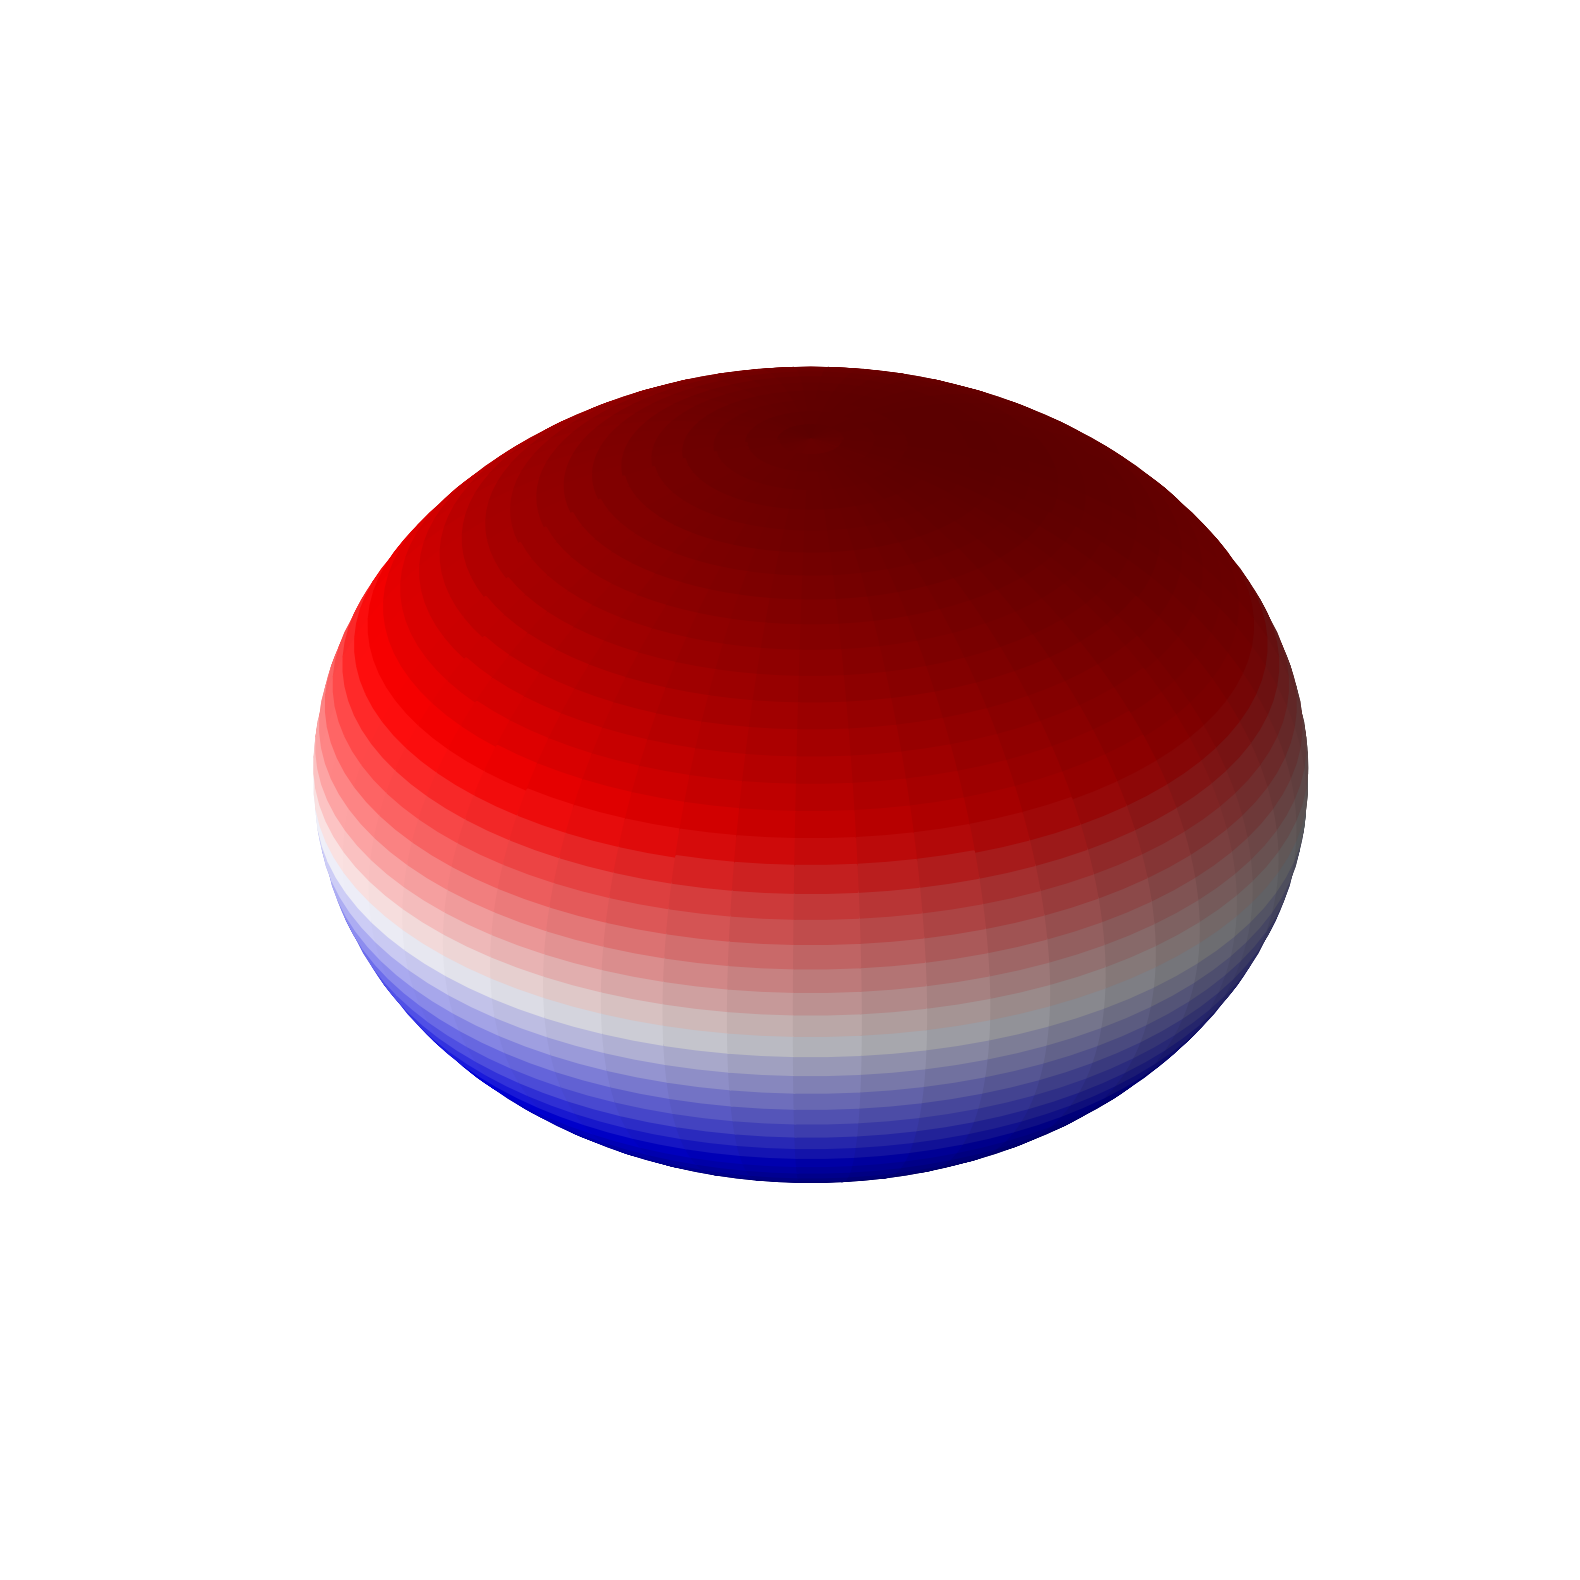

In [5]:
@widgets.interact(l = np.arange(0,10,1),m=np.arange(-l,l+1,1))

def plot_SphHarm(l=1,m=0):

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    Ylm  = sph_harm(m, l, theta, phi).real

    fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())

    ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors))

    ax.set_axis_off()
    

    # Set axes limit to keep aspect ratio 1:1:1
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)

### Making volume plot with ipyvolumes


- [IPyvolume](https://ipyvolume.readthedocs.io/en/latest/index.html) is a Python library to visualize 3D volumes. 

In [6]:
import ipyvolume as ipv

ModuleNotFoundError: No module named 'ipyvolume'

In [ ]:
ipv.figure()

m, l =  0, 1

Ylm  = sph_harm(m, l, theta, phi).real  

fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())

mesh = ipv.plot_surface(x, y, z, color=cm.seismic(fcolors))  # Feeding our x,y,z and colormap defined previously

ipv.show()

In [ ]:
ipv.show()